In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
ordinal_lasso = pd.read_csv('Ordinal+Lasso.csv')
ordinal_lasso.shape

(2580, 84)

In [3]:
X_ordinal = ordinal_lasso.drop(['SalePrice'], axis=1).values
Y_ordinal = ordinal_lasso.SalePrice.values

In [4]:
X_ordinal.shape

(2580, 83)

In [5]:
len(Y_ordinal)

2580

In [6]:
X_ordinal.shape[1]

83

In [7]:
AR2_Ordinal = []
MAE_Ordinal = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y_ordinal)-1)/(len(Y_ordinal)-X_ordinal.shape[1]-1)
    AR2_Ordinal.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Ordinal.append(mae)

In [8]:
Ordinal = pd.DataFrame({'AR2_Ordinal': AR2_Ordinal, 'MAE_Ordinal': MAE_Ordinal})
Ordinal

,AR2_Ordinal,MAE_Ordinal
0,0.894763,12208.680164
1,0.956667,11296.805145
2,0.954013,11732.079728
3,0.940420,10960.115054
4,0.913260,12240.064414
5,0.939466,12172.199342
6,0.910124,12714.642051
7,0.938954,12002.431436
8,0.907964,12363.452543
9,0.943829,11612.595603


In [9]:
Ordinal.describe()

,AR2_Ordinal,MAE_Ordinal
count,100.000000,100.000000
mean,0.931867,11836.888155
std,0.017265,419.737602
min,0.887570,10960.115054
25%,0.915656,11579.063069
50%,0.938521,11755.391961
75%,0.944653,12156.384769
max,0.956667,13065.933849


In [10]:
ord_lasso_drop1 = pd.read_csv('Ordinal+Lasso_Drop1.csv')
ord_lasso_drop1.shape

(2579, 84)

In [11]:
X_ord_drop1 = ord_lasso_drop1.drop(['SalePrice'], axis=1).values
Y_ord_drop1 = ord_lasso_drop1.SalePrice.values

In [12]:
X_ord_drop1.shape

(2579, 83)

In [13]:
len(Y_ord_drop1)

2579

In [14]:
X_ord_drop1.shape[1]

83

In [15]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ord_drop1,Y_ord_drop1,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y_ord_drop1)-1)/(len(Y_ord_drop1)-X_ord_drop1.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)

In [16]:
OrdinalDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
OrdinalDrop1

,AR2_Drop1,MAE_Drop1
0,0.939781,11554.691116
1,0.943666,11986.727592
2,0.951604,10744.870056
3,0.948464,11026.760174
4,0.943463,11705.064424
5,0.952848,10998.469137
6,0.942630,11640.225815
7,0.954126,11371.194923
8,0.952423,11128.616668
9,0.947167,11867.567906


In [17]:
OrdinalDrop1.describe()

,AR2_Drop1,MAE_Drop1
count,100.000000,100.000000
mean,0.947268,11378.290035
std,0.005360,450.827895
min,0.929496,10229.913065
25%,0.943439,11019.905666
50%,0.947780,11369.239978
75%,0.951032,11685.104710
max,0.960060,12708.806531


In [18]:
ord_lasso_dropIF = pd.read_csv('Ordinal+Lasso_DropIF.csv')
ord_lasso_dropIF.shape

(2568, 84)

In [19]:
X3 = ord_lasso_dropIF.drop(['SalePrice'], axis=1).values
Y3 = ord_lasso_dropIF.SalePrice.values

In [20]:
X3.shape

(2568, 83)

In [21]:
len(Y3)

2568

In [22]:
X3.shape[1]

83

In [23]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y3)-1)/(len(Y3)-X3.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)

In [24]:
OrdinalDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
OrdinalDropIF

,AR2_DropIF,MAE_DropIF
0,0.947771,11393.600753
1,0.941931,11093.482361
2,0.946314,10894.107827
3,0.944683,11549.920143
4,0.954705,10837.374063
5,0.938294,11236.893061
6,0.944200,11553.903371
7,0.949428,10782.749876
8,0.955023,11356.464658
9,0.942642,11467.670955


In [25]:
OrdinalDropIF.describe()

,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000
mean,0.949413,11250.803208
std,0.005255,418.620462
min,0.937935,10314.167847
25%,0.945752,10944.849918
50%,0.949011,11233.583387
75%,0.953403,11541.379317
max,0.962689,12418.688407


In [26]:
box = pd.concat([Ordinal, OrdinalDrop1, OrdinalDropIF], axis=1)
box

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.894763,12208.680164,0.939781,11554.691116,0.947771,11393.600753
1,0.956667,11296.805145,0.943666,11986.727592,0.941931,11093.482361
2,0.954013,11732.079728,0.951604,10744.870056,0.946314,10894.107827
3,0.940420,10960.115054,0.948464,11026.760174,0.944683,11549.920143
4,0.913260,12240.064414,0.943463,11705.064424,0.954705,10837.374063
5,0.939466,12172.199342,0.952848,10998.469137,0.938294,11236.893061
6,0.910124,12714.642051,0.942630,11640.225815,0.944200,11553.903371
7,0.938954,12002.431436,0.954126,11371.194923,0.949428,10782.749876
8,0.907964,12363.452543,0.952423,11128.616668,0.955023,11356.464658
9,0.943829,11612.595603,0.947167,11867.567906,0.942642,11467.670955


In [27]:
box.describe()

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.931867,11836.888155,0.947268,11378.290035,0.949413,11250.803208
std,0.017265,419.737602,0.005360,450.827895,0.005255,418.620462
min,0.887570,10960.115054,0.929496,10229.913065,0.937935,10314.167847
25%,0.915656,11579.063069,0.943439,11019.905666,0.945752,10944.849918
50%,0.938521,11755.391961,0.947780,11369.239978,0.949011,11233.583387
75%,0.944653,12156.384769,0.951032,11685.104710,0.953403,11541.379317
max,0.956667,13065.933849,0.960060,12708.806531,0.962689,12418.688407


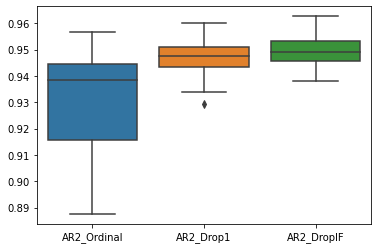

In [28]:
sns.boxplot(data=box[['AR2_Ordinal','AR2_Drop1','AR2_DropIF']]);

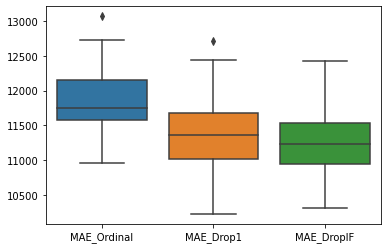

In [29]:
sns.boxplot(data=box[['MAE_Ordinal','MAE_Drop1','MAE_DropIF']]);